In [2]:
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import tensorflowjs as tfjs
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pipeline.prepare import prepare_data_tfds, prepare_data_kaggle
from pipeline.model import create_model
from pipeline.evaluate import plot_learning_curves

In [3]:
x_train, x_test, y_train, y_test = prepare_data_tfds('the300w_lp', 'landmarks_3d', 2000)

In [4]:
from tensorflow.keras import layers, Model, Input, applications
from tensorflow.keras.models import Sequential

input_shape = (450, 450, 3)

base_model = applications.VGG19(include_top=False, weights='imagenet', input_shape=input_shape)        
base_model.trainable = False

inputs = Input(shape=input_shape)
m = layers.experimental.preprocessing.Rescaling(1./255)(inputs)
m = base_model(m, training=False)
m = layers.Flatten()(m)
m = layers.Dense(256, activation='relu')(m)
outputs = layers.Dense(136)(m)
model = Model(inputs, outputs)

In [5]:
model.compile(optimizer='adam', 
          loss='mean_squared_error')

In [6]:
history = model.fit(x_train, y_train, batch_size=50, epochs=40, validation_data =(x_test, y_test))

Epoch 1/40
30/30 [==============================] - 714s 24s/step - loss: 36503.5173 - val_loss: 2652.4690
Epoch 2/40
30/30 [==============================] - 708s 24s/step - loss: 1819.9139 - val_loss: 1048.0063
Epoch 3/40
30/30 [==============================] - 715s 24s/step - loss: 950.8382 - val_loss: 849.1183
Epoch 4/40
30/30 [==============================] - 724s 24s/step - loss: 748.6733 - val_loss: 650.3833
Epoch 5/40
30/30 [==============================] - 538s 18s/step - loss: 565.6112 - val_loss: 465.8467
Epoch 6/40
30/30 [==============================] - 594s 20s/step - loss: 382.1650 - val_loss: 341.6511
Epoch 7/40
30/30 [==============================] - 710s 24s/step - loss: 267.3938 - val_loss: 295.6328
Epoch 8/40
30/30 [==============================] - 708s 24s/step - loss: 235.1789 - val_loss: 264.4312
Epoch 9/40
30/30 [==============================] - 709s 24s/step - loss: 205.7375 - val_loss: 249.9701
Epoch 10/40
30/30 [==============================] - 649s 2

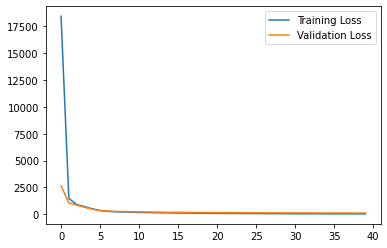

In [7]:
#loss 101
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

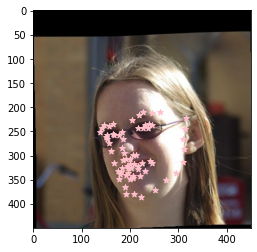

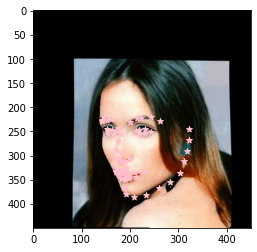

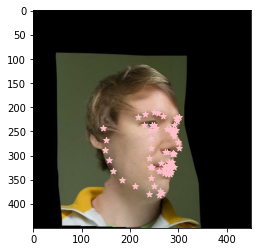

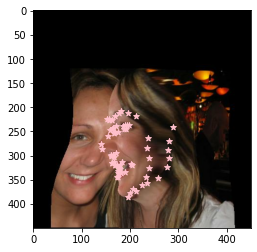

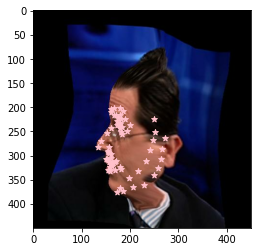

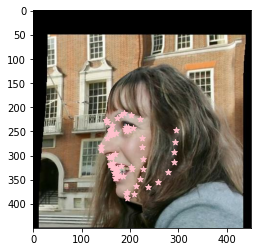

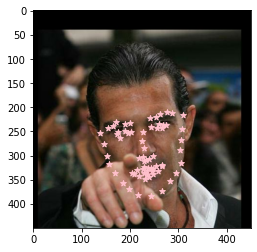

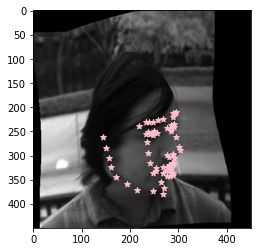

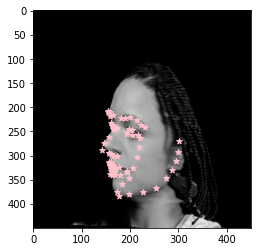

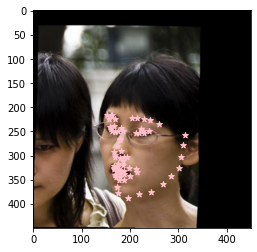

In [9]:
p = model.predict(x_train[:10])
for i in range(len(p)):
    plt.imshow(np.uint8(x_train[i]))
    plt.scatter(p[i][0::2], p[i][1::2], c='Pink', marker='*')
    plt.show()

In [10]:
tfjs.converters.save_keras_model(model, 'deepmoji_transferlearning')